In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

READING DATA

In [2]:
data = pd.read_csv("data.csv")

In [3]:
data.head(8)

,YEAR,month,date,date.1,maximum temp,minimum temp,surface level pressure,dew point temperature,relative humidity,vapour pressure,wind speed,type of weather,storm surge
0,2000,1,1,01/01/00,29.3,21.3,1012.9,20.6,73,24.3,12,0,8103.200000
1,2000,1,2,02/01/00,29.2,21.0,1012.7,19.6,78,22.8,8,5,5063.500000
2,2000,1,3,03/01/00,29.4,22.0,1012.1,20.7,80,24.4,4,0,3036.300000
3,2000,1,4,04/01/00,28.4,20.5,1012.0,20.1,83,23.5,8,0,2277.000000
4,2000,1,5,05/01/00,29.2,22.7,1011.7,21.6,83,25.8,6,5,1821.060000
5,2000,1,6,06/01/00,29.5,23.5,1012.0,21.9,82,26.3,12,5,1855.333333
6,2000,1,7,07/01/00,28.3,23.1,1011.7,21.5,79,25.6,12,0,1445.285714
7,2000,1,8,08/01/00,29.4,22.1,1012.9,21.0,83,24.9,4,5,1266.125000


In [4]:
data = data.drop(columns = ['YEAR', 'month', 'date','date.1'])

In [5]:
data.head()

,maximum temp,minimum temp,surface level pressure,dew point temperature,relative humidity,vapour pressure,wind speed,type of weather,storm surge
0,29.3,21.3,1012.9,20.6,73,24.3,12,0,8103.20
1,29.2,21.0,1012.7,19.6,78,22.8,8,5,5063.50
2,29.4,22.0,1012.1,20.7,80,24.4,4,0,3036.30
3,28.4,20.5,1012.0,20.1,83,23.5,8,0,2277.00
4,29.2,22.7,1011.7,21.6,83,25.8,6,5,1821.06


In [6]:
data.shape

(8546, 9)

In [7]:
data.describe()

,maximum temp,minimum temp,surface level pressure,dew point temperature,relative humidity,vapour pressure,wind speed,type of weather,storm surge
count,8545.000000,8545.000000,8546.000000,8546.000000,8546.000000,8546.000000,8546.000000,8546.000000,8546.000000
mean,33.503382,25.235822,1009.020934,23.552141,76.513340,29.237316,5.040721,2.203019,860.963242
std,3.196473,2.684930,11.570758,2.126366,10.830656,3.659595,4.329006,3.233108,1318.803794
min,22.500000,17.500000,0.000000,1.000000,43.000000,3.900000,0.000000,0.000000,0.000000
25%,30.900000,23.300000,1005.900000,22.100000,70.000000,26.600000,2.000000,0.000000,267.740000
50%,33.500000,25.400000,1009.100000,23.800000,77.000000,29.500000,4.000000,0.000000,414.794516
75%,35.700000,27.400000,1012.300000,25.100000,84.000000,31.900000,8.000000,5.000000,808.300000
max,45.000000,31.800000,1019.400000,29.800000,100.000000,41.900000,140.000000,9.000000,14211.400000


PRE - PROCESSING OF DATA

In [8]:
any_null = data.isnull().any().any()

if any_null:
    print("There are null values in the DataFrame.")
else:
    print("There are no null values in the DataFrame.")

There are null values in the DataFrame.


In [9]:
data = data.dropna()

In [10]:
data = data.drop_duplicates()

In [11]:
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data_filtered = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data_filtered

In [12]:
columns = ['maximum temp', 'minimum temp',
       'surface level pressure', 'dew point temperature', 'relative humidity',
       'vapour pressure', 'wind speed', 'type of weather', 'storm surge']

In [13]:
data_filtered = remove_outliers(data,columns)
print("DataFrame before removing outliers:")
print(data)
print("\nDataFrame after removing outliers:")
print(data_filtered)

DataFrame before removing outliers:
      maximum temp  minimum temp  surface level pressure  \
0             29.3          21.3                  1012.9   
1             29.2          21.0                  1012.7   
2             29.4          22.0                  1012.1   
3             28.4          20.5                  1012.0   
4             29.2          22.7                  1011.7   
...            ...           ...                     ...   
8541          34.8          26.3                  1006.9   
8542          35.2          25.8                  1006.6   
8543          35.9          24.7                  1006.7   
8544          35.1          25.0                  1007.5   
8545          35.0          24.5                  1008.6   

      dew point temperature  relative humidity  vapour pressure  wind speed  \
0                      20.6                 73             24.3          12   
1                      19.6                 78             22.8           8   
2     

In [14]:
data.head()

,maximum temp,minimum temp,surface level pressure,dew point temperature,relative humidity,vapour pressure,wind speed,type of weather,storm surge
0,29.3,21.3,1012.9,20.6,73,24.3,12,0,8103.20
1,29.2,21.0,1012.7,19.6,78,22.8,8,5,5063.50
2,29.4,22.0,1012.1,20.7,80,24.4,4,0,3036.30
3,28.4,20.5,1012.0,20.1,83,23.5,8,0,2277.00
4,29.2,22.7,1011.7,21.6,83,25.8,6,5,1821.06


In [15]:
import seaborn as sns

In [16]:
df = pd.DataFrame(data)

In [17]:
correlation_matrix = df.corr()


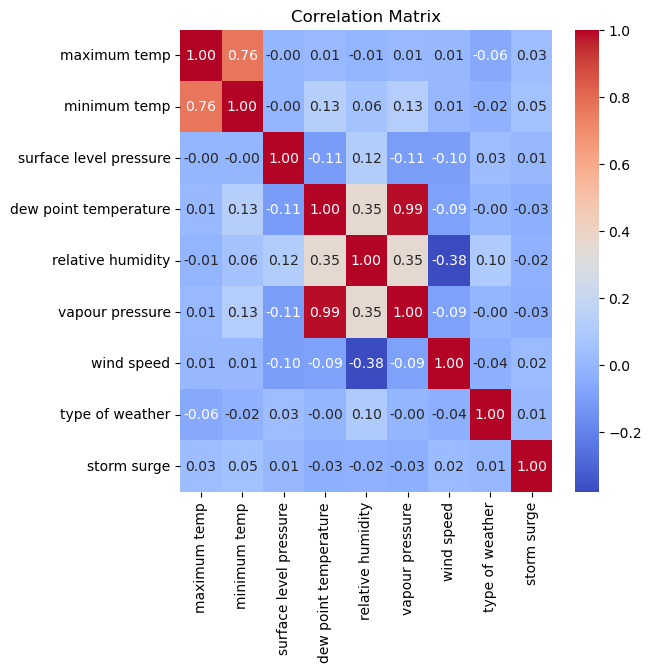

In [18]:
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()

In [19]:
import seaborn as sns

/Users/jainivedhitha/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


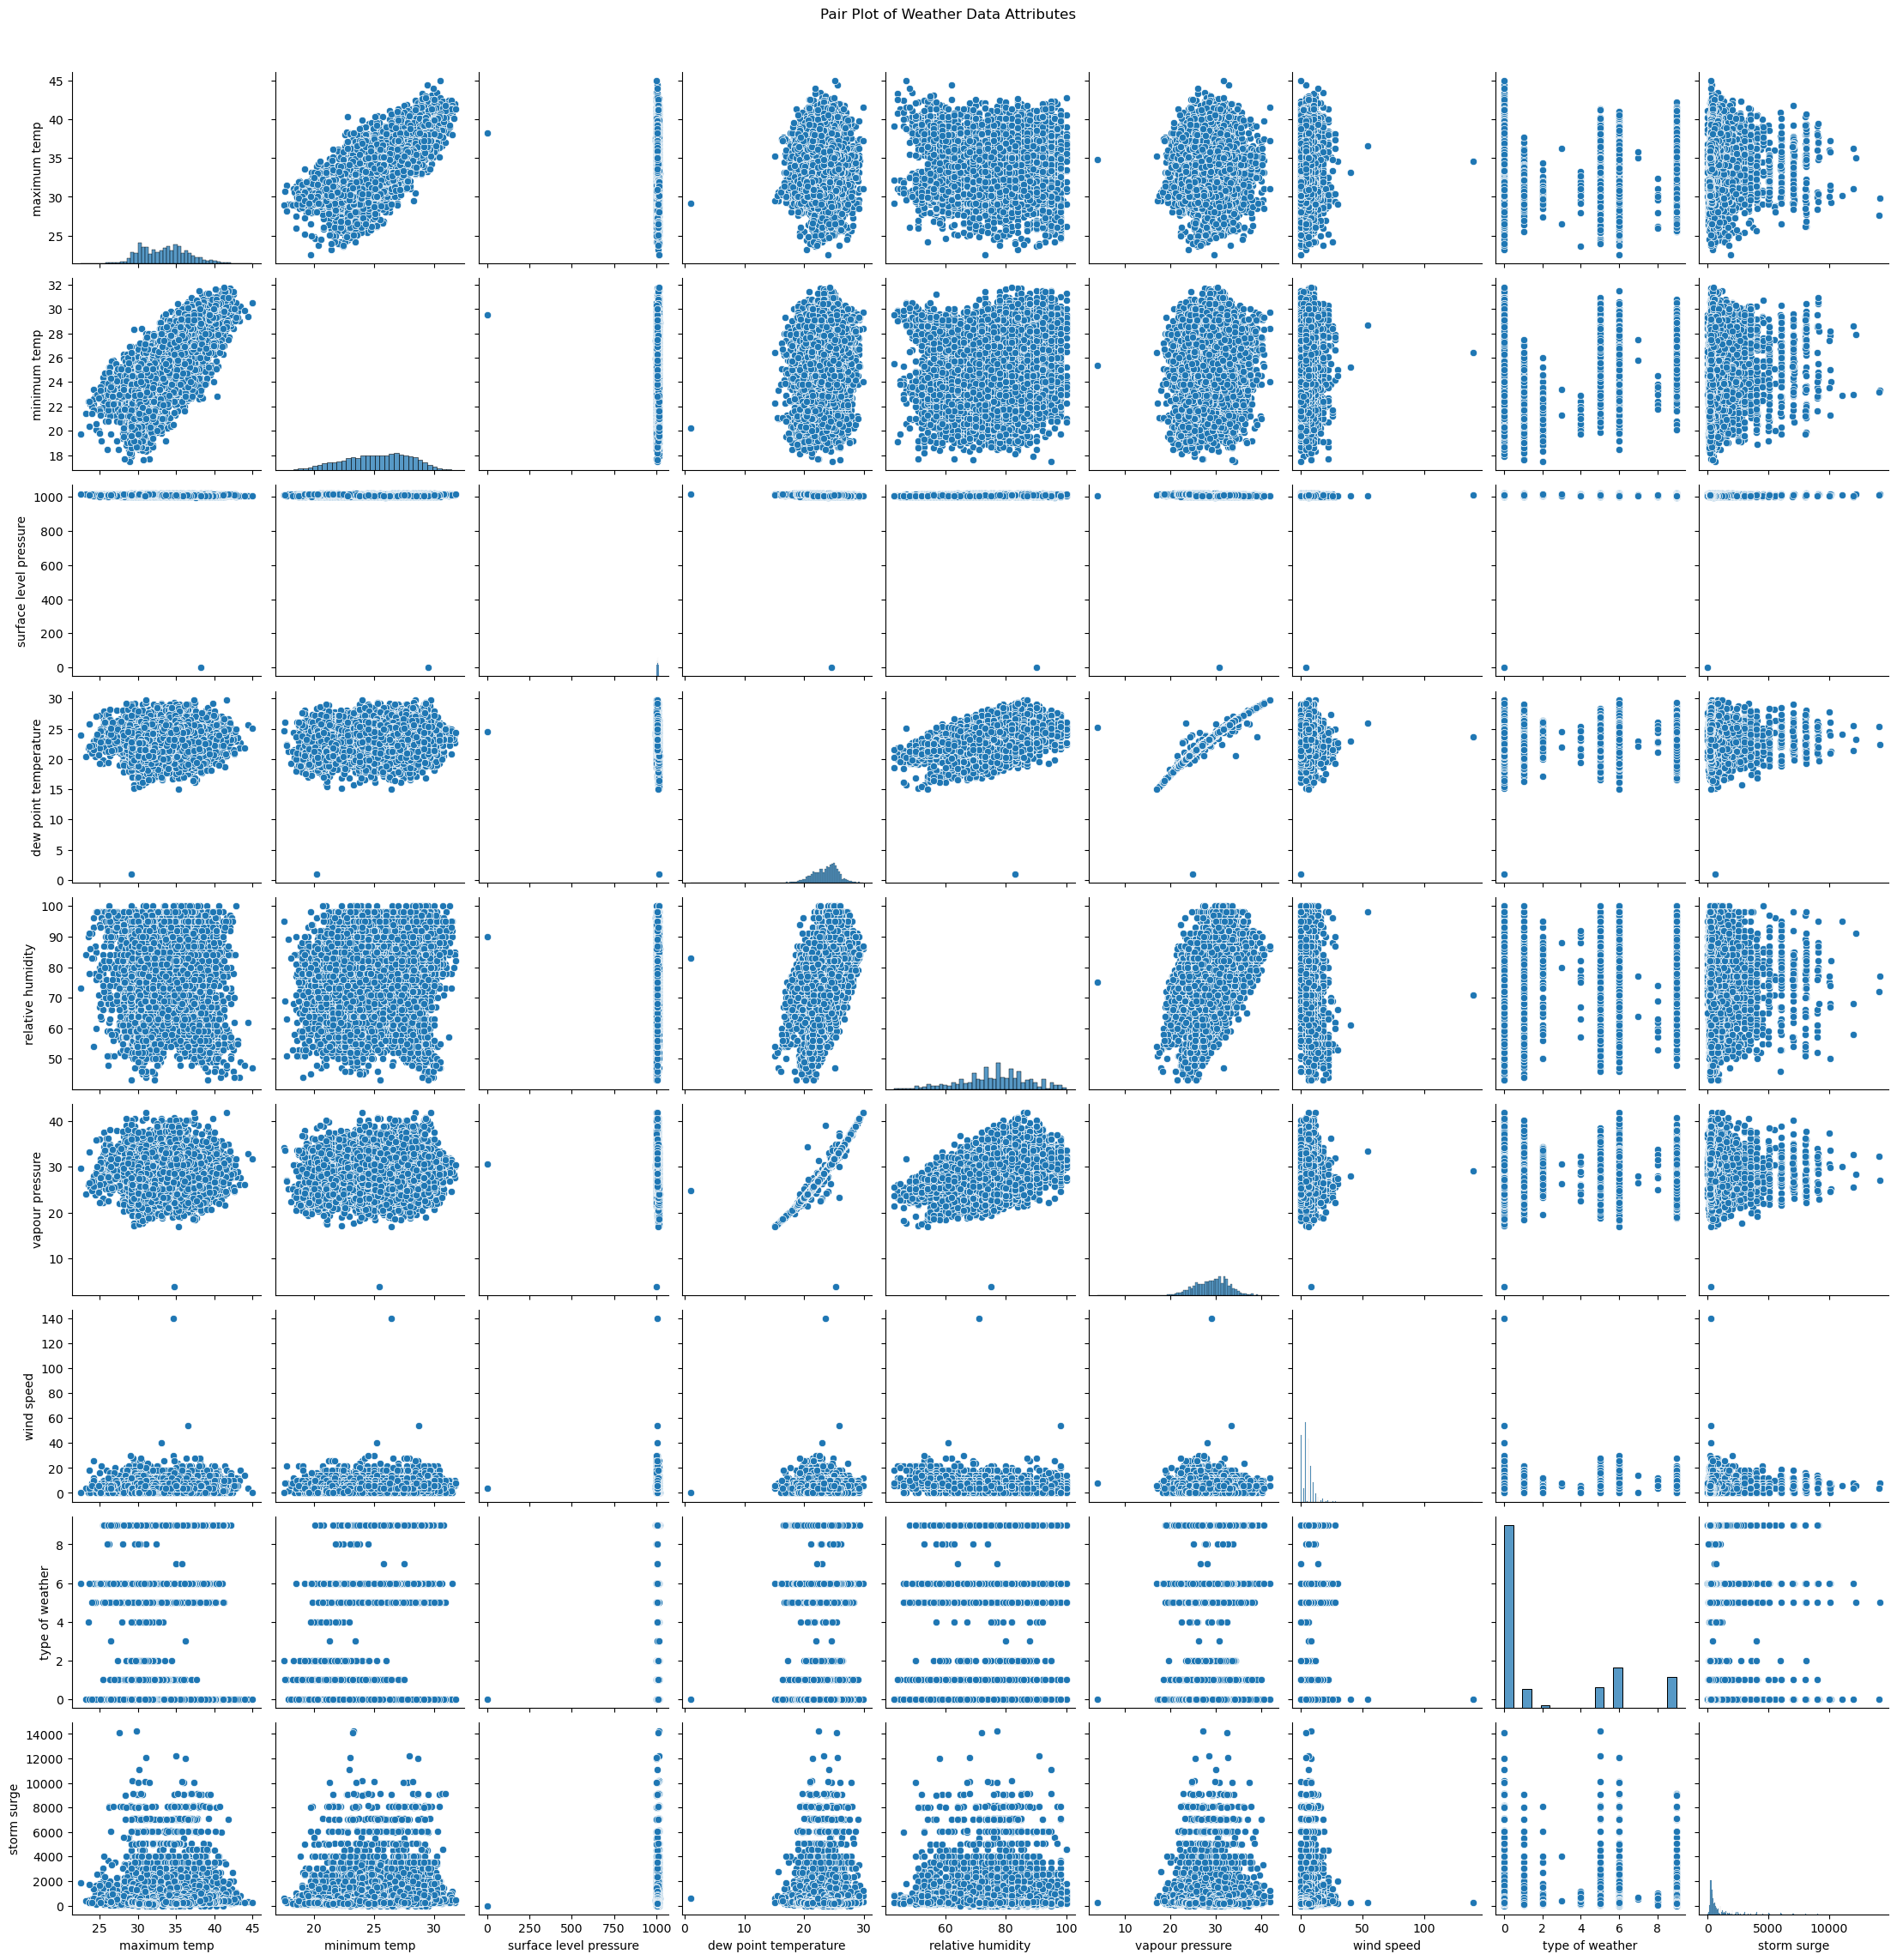

In [20]:
numerical_cols = df.select_dtypes(include='number')

# Plot pair plot
sns.pairplot(numerical_cols)
plt.suptitle('Pair Plot of Weather Data Attributes', y=1.02)
plt.show()

PRINCIPAL COMPONENT ANALYSIS

In [21]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [22]:
data = data.dropna()

In [23]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [24]:
pca = PCA(n_components=4)
pca.fit(scaled_data)

PCA(n_components=4)

In [25]:
x_pca = pca.transform(scaled_data)

In [26]:
x_pca

array([[ 2.76961879, -0.77452915,  0.51005026,  4.48503355],
       [ 2.87201607, -1.30039737, -0.74494344,  3.14507063],
       [ 1.94448557, -1.24607588, -0.7249171 ,  0.97296495],
       ...,
       [-0.38262203,  0.10760769, -0.20151313,  0.60593084],
       [-0.53320057, -0.0104183 , -0.07856424,  0.67772566],
       [-1.02054165, -0.19556383,  0.02691991,  0.03876802]])

In [27]:
principal_components = pca.fit_transform(scaled_data)

In [28]:
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2','PC3','PC4'])
final_data = pd.concat([principal_df, data.reset_index(drop=True)], axis=1)


In [29]:
sampled_pca_df = final_data.sample(n=50, random_state=42)

/Users/jainivedhitha/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


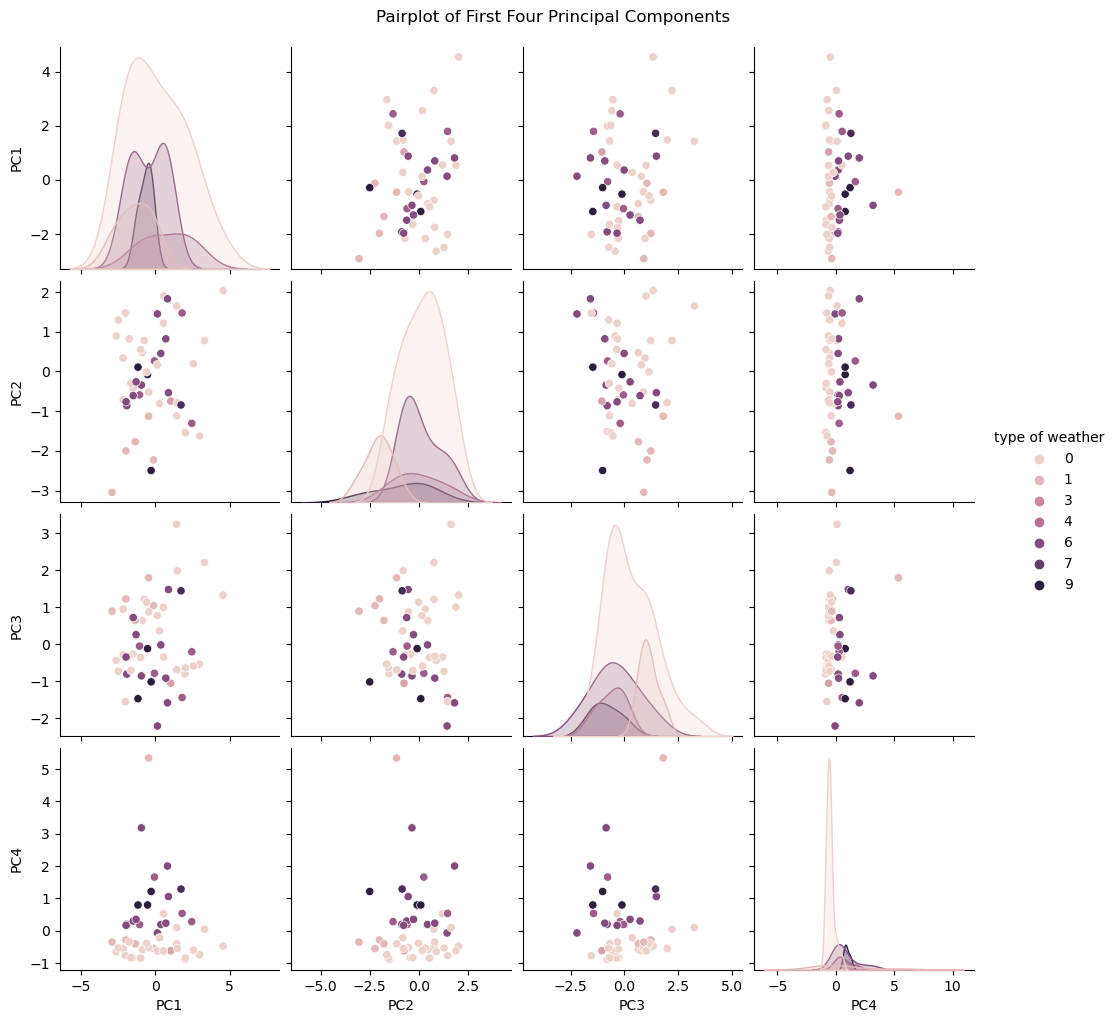

In [30]:
# Plot the sampled data
sns.pairplot(sampled_pca_df, vars=['PC1', 'PC2', 'PC3', 'PC4'], hue='type of weather')
plt.suptitle('Pairplot of First Four Principal Components', y=1.02)
plt.show()


In [31]:
final_data = final_data.drop(columns = ['storm surge'],axis = 1)

In [32]:
x = final_data.iloc[:,:-1].values
y = final_data.iloc[:,-1].values

In [33]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)


TRAIN_TEST_SPLIT

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.2,random_state = 40)

In [36]:
x_train

array([[0.28964783, 0.70623794, 0.08128773, ..., 0.64912281, 0.78684211,
        0.02857143],
       [0.65367072, 0.32429287, 0.05652558, ..., 0.56140351, 0.49473684,
        0.02857143],
       [0.36560028, 0.48345262, 0.07274626, ..., 0.54385965, 0.73684211,
        0.        ],
       ...,
       [0.24998695, 0.56581728, 0.06664091, ..., 0.75438596, 0.80789474,
        0.        ],
       [0.41309189, 0.33210801, 0.07844937, ..., 0.43859649, 0.73684211,
        0.02857143],
       [0.30668899, 0.40931848, 0.0938496 , ..., 0.54385965, 0.83421053,
        0.04285714]])

In [37]:
y_train

array([0, 0, 0, ..., 0, 9, 6])

In [38]:
x_test

array([[0.35193223, 0.55517699, 0.07379421, ..., 0.52631579, 0.74210526,
        0.        ],
       [0.38428586, 0.40985099, 0.08001965, ..., 0.77192982, 0.71578947,
        0.05714286],
       [0.36609529, 0.33585902, 0.06834313, ..., 0.85964912, 0.73157895,
        0.05714286],
       ...,
       [0.37730714, 0.30563712, 0.08878134, ..., 0.61403509, 0.76052632,
        0.02857143],
       [0.41042923, 0.20447011, 0.09956056, ..., 0.57894737, 0.76052632,
        0.05714286],
       [0.65601859, 0.3300319 , 0.09516195, ..., 0.31578947, 0.54473684,
        0.05714286]])

In [39]:
y_test

array([0, 5, 9, ..., 0, 1, 0])

In [40]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import accuracy_score

In [41]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np


In [42]:
k = 35

# Initialize a KFold object
kf = KFold(n_splits=k, shuffle=True, random_state=42)


In [43]:
svm_mse_scores, svm_r2_scores = [], []
rf_mse_scores, rf_r2_scores = [], []
rnn_mse_scores, rnn_r2_scores = [], []
dt_mse_scores, dt_r2_scores = [], []
ensemble_mse_scores, ensemble_r2_scores = [], []

In [44]:
for train_index, test_index in kf.split(x_train):
    x_train_fold, x_val_fold = x_train[train_index], x_train[test_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[test_index]
    
    # Support Vector Machine (SVM) with linear kernel
    svm_model = SVR(kernel='rbf')
    svm_model.fit(x_train_fold, y_train_fold)
    svm_predictions = svm_model.predict(x_val_fold)
    svm_mse = mean_squared_error(y_val_fold, svm_predictions)
    svm_r2 = r2_score(y_val_fold, svm_predictions)
    svm_mse_scores.append(svm_mse)
    svm_r2_scores.append(svm_r2)
    
    # Random Forest
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(x_train_fold, y_train_fold)
    rf_predictions = rf_model.predict(x_val_fold)
    rf_mse = mean_squared_error(y_val_fold, rf_predictions)
    rf_r2 = r2_score(y_val_fold, rf_predictions)
    rf_mse_scores.append(rf_mse)
    rf_r2_scores.append(rf_r2)
    
    # Recurrent Neural Network (RNN)
    x_train_rnn = np.reshape(x_train_fold, (x_train_fold.shape[0], 1, x_train_fold.shape[1]))
    x_val_rnn = np.reshape(x_val_fold, (x_val_fold.shape[0], 1, x_val_fold.shape[1]))
    rnn_model = Sequential([
        LSTM(30, activation='relu', input_shape=(1, x_train_fold.shape[1])),
        Dense(1)
    ])
    rnn_model.compile(optimizer='adam', loss='mse')
    rnn_model.fit(x_train_rnn, y_train_fold, epochs=50, batch_size=32, verbose=0)
    rnn_predictions = rnn_model.predict(x_val_rnn).reshape(-1)
    rnn_mse = mean_squared_error(y_val_fold, rnn_predictions)
    rnn_r2 = r2_score(y_val_fold, rnn_predictions)
    rnn_mse_scores.append(rnn_mse)
    rnn_r2_scores.append(rnn_r2)
    
    # Decision Tree Regressor
    dt_model = DecisionTreeRegressor(random_state=31)
    dt_model.fit(x_train_fold, y_train_fold)
    dt_predictions = dt_model.predict(x_val_fold)
    dt_mse = mean_squared_error(y_val_fold, dt_predictions)
    dt_r2 = r2_score(y_val_fold, dt_predictions)
    dt_mse_scores.append(dt_mse)
    dt_r2_scores.append(dt_r2)
    
    # Ensemble Model (Voting Regressor)
    ensemble_model = VotingRegressor([
        ('svm', SVR(kernel='linear')),
        ('random_forest', RandomForestRegressor(n_estimators=100, random_state=42)),
        ('decisiontreeregressor', DecisionTreeRegressor(random_state=42))
    ])
    ensemble_model.fit(x_train_fold, y_train_fold)
    ensemble_predictions = ensemble_model.predict(x_val_fold)
    ensemble_mse = mean_squared_error(y_val_fold, ensemble_predictions)
    ensemble_r2 = r2_score(y_val_fold, ensemble_predictions)
    ensemble_mse_scores.append(ensemble_mse)
    ensemble_r2_scores.append(ensemble_r2)

7/7 [==============================] - 0s 423us/step


In [45]:
avg_svm_mse = np.mean(svm_mse_scores)
avg_rf_mse = np.mean(rf_mse_scores)
avg_rnn_mse = np.mean(rnn_mse_scores)
avg_dt_mse = np.mean(dt_mse_scores)
avg_ensemble_mse = np.mean(ensemble_mse_scores)


In [46]:
print("Support Vector Machine (SVM) Average MSE:", avg_svm_mse)
print("Random Forest Average MSE:", avg_rf_mse)
print("Recurrent Neural Network (RNN) Average MSE:", avg_rnn_mse)
print("Decision Tree Regressor Average MSE:", avg_dt_mse)
print("Ensemble Model (Voting Regressor) Average MSE:", avg_ensemble_mse)

Support Vector Machine (SVM) Average MSE: 2.5298359145825953
Random Forest Average MSE: 2.060409206698064
Recurrent Neural Network (RNN) Average MSE: 3.057649244231685
Decision Tree Regressor Average MSE: 4.295676908125888
Ensemble Model (Voting Regressor) Average MSE: 2.5375412074235255


In [47]:
avg_svm_r2 = np.mean(svm_r2_scores)
avg_rf_r2 = np.mean(rf_r2_scores)
avg_rnn_r2 = np.mean(rnn_r2_scores)
avg_dt_r2 = np.mean(dt_r2_scores)
avg_ensemble_r2 = np.mean(ensemble_r2_scores)

In [48]:
print("Support Vector Machine (SVM) Average R-squared:", avg_svm_r2)
print("Random Forest Average R-squared:", avg_rf_r2)
print("Recurrent Neural Network (RNN) Average R-squared:", avg_rnn_r2)
print("Decision Tree Regressor Average R-squared:", avg_dt_r2)
print("Ensemble Model (Voting Regressor) Average R-squared:", avg_ensemble_r2)

Support Vector Machine (SVM) Average R-squared: 0.7573703333661262
Random Forest Average R-squared: 0.8025065943248322
Recurrent Neural Network (RNN) Average R-squared: 0.7079151095166321
Decision Tree Regressor Average R-squared: 0.5893869145570091
Ensemble Model (Voting Regressor) Average R-squared: 0.757101136111968


HYBRID MODEL

In [49]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.pipeline import make_pipeline
from sklearn.base import BaseEstimator, RegressorMixin
import numpy as np

In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [51]:
class HybridRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, random_state=None):
        self.rf = RandomForestRegressor(random_state=random_state)
        self.gp = GaussianProcessRegressor(
            kernel=C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2)),
            n_restarts_optimizer=10,
            optimizer='fmin_l_bfgs_b',  # Specify the optimization algorithm
        )
    
    def fit(self, x, y):
        self.rf.fit(x, y)
        self.gp.fit(x, y)
        return self
    
    def predict(self, x):
        rf_pred = self.rf.predict(x)
        gp_pred = self.gp.predict(x)
        return (rf_pred + gp_pred) / 2.0


In [52]:
hybrid_model = HybridRegressor(random_state = 42)

In [ ]:
hybrid_model.fit(x_train_scaled, y_train)

In [54]:
predictions = hybrid_model.predict(x_test_scaled)

In [55]:
print("Predictions:", predictions)

Predictions: [-7.74860382e-07  5.09999648e+00  8.71499762e+00 ...  1.74999821e-01
  7.44996603e-01  2.05000238e-01]


In [56]:
mse_h = mean_squared_error(y_test, predictions)
r2_h = r2_score(y_test, predictions)

In [57]:
print("Mean Squared Error (MSE):", mse_h)
print("R-squared (R2):", r2_h)

Mean Squared Error (MSE): 0.464036624991912
R-squared (R2): 0.9541436095346842


In [58]:
avg_svm_mse = 2.5298317682436715
avg_rf_mse = 2.060409206698064
avg_rnn_mse = 3.0356390252544947
avg_dt_mse = 4.295676908125888
avg_ensemble_mse = 2.5375389770846453
mse_h= 0.4640365751484568

In [59]:
avg_svm_r2 = 0.7573707339986379
avg_rf_r2 = 0.8025065943248322
avg_rnn_r2 = 0.7104452711886879
avg_dt_r2 = 0.5893869145570091
avg_ensemble_r2 = 0.7571013339574416
r2_h = 0.9541436144602458

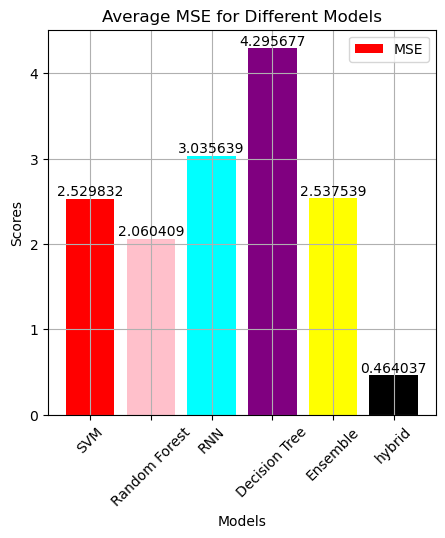

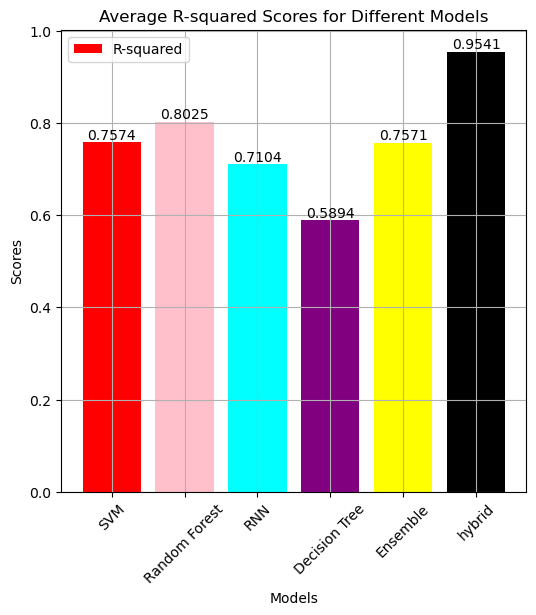

In [60]:
import matplotlib.pyplot as plt

# Define the models
models = ['SVM', 'Random Forest', 'RNN', 'Decision Tree', 'Ensemble','hybrid']
colours = ['red','pink','cyan','purple','yellow','black']

# Define the average MSE and R-squared scores for each model
avg_mse_scores = [avg_svm_mse, avg_rf_mse, avg_rnn_mse, avg_dt_mse, avg_ensemble_mse,mse_h]
avg_r2_scores = [avg_svm_r2, avg_rf_r2, avg_rnn_r2, avg_dt_r2, avg_ensemble_r2,r2_h]

# Create a bar plot for MSE
plt.figure(figsize=(5,5))
bars = plt.bar(models, avg_mse_scores, color=colours, label='MSE')

# Annotate each bar with its value
for bar, score in zip(bars, avg_mse_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(score, 6),
             ha='center', va='bottom')

plt.title('Average MSE for Different Models')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# Create a bar plot for R-squared
plt.figure(figsize=(6,6))
bars = plt.bar(models, avg_r2_scores, color=colours, label='R-squared')

# Annotate each bar with its value
for bar, score in zip(bars, avg_r2_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(score, 4),
             ha='center', va='bottom')

plt.title('Average R-squared Scores for Different Models')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)# Set the y-axis range
plt.show()


MONTO CARLO DROPOUT FORECAST METHOD

In [61]:
import numpy as np

# Define the number of Monte Carlo samples
num_samples = 100  # Adjust this value based on your requirements

# Define a function for Monte Carlo dropout forecast
def monte_carlo_dropout_forecast(model, input_data, num_samples):
    forecasts = []
    for _ in range(num_samples):
        forecast = model.predict(input_data)
        forecasts.append(forecast)
    forecasts = np.array(forecasts)
    forecast_mean = np.mean(forecasts, axis=0)
    forecast_stddev = np.std(forecasts, axis=0)
    return forecast_mean, forecast_stddev

# Example usage for SVM
svm_forecast_mean, svm_forecast_stddev = monte_carlo_dropout_forecast(svm_model, x_val_fold, num_samples)

# Example usage for Random Forest
rf_forecast_mean, rf_forecast_stddev = monte_carlo_dropout_forecast(rf_model, x_val_fold, num_samples)

# Example usage for RNN
x_val_rnn = np.reshape(x_val_fold, (x_val_fold.shape[0], 1, x_val_fold.shape[1]))
rnn_forecast_mean, rnn_forecast_stddev = monte_carlo_dropout_forecast(rnn_model, x_val_rnn, num_samples)

# Example usage for Decision Tree
dt_forecast_mean, dt_forecast_stddev = monte_carlo_dropout_forecast(dt_model, x_val_fold, num_samples)

# Example usage for Ensemble Model
ensemble_forecast_mean, ensemble_forecast_stddev = monte_carlo_dropout_forecast(ensemble_model, x_val_fold, num_samples)


hybrid_forecast_mean, hybrid_forecast_stddev = monte_carlo_dropout_forecast(hybrid_model, x_test_scaled, num_samples)


7/7 [==============================] - 0s 357us/step


In [62]:
# Define a function to calculate upper and lower bounds
def calculate_range(forecast_mean, forecast_stddev, confidence_level=2):
    upper_bound = forecast_mean + confidence_level * forecast_stddev
    lower_bound = forecast_mean - confidence_level * forecast_stddev
    return lower_bound, upper_bound

# Example usage for SVM
svm_lower_bound, svm_upper_bound = calculate_range(svm_forecast_mean, svm_forecast_stddev)

# Example usage for Random Forest
rf_lower_bound, rf_upper_bound = calculate_range(rf_forecast_mean, rf_forecast_stddev)

# Example usage for RNN
rnn_lower_bound, rnn_upper_bound = calculate_range(rnn_forecast_mean, rnn_forecast_stddev)

# Example usage for Decision Tree
dt_lower_bound, dt_upper_bound = calculate_range(dt_forecast_mean, dt_forecast_stddev)

# Example usage for Ensemble Model
ensemble_lower_bound, ensemble_upper_bound = calculate_range(ensemble_forecast_mean, ensemble_forecast_stddev)

hybrid_lower_bound, hybrid_upper_bound = calculate_range(hybrid_forecast_mean, hybrid_forecast_stddev)

In [63]:

import numpy as np
import matplotlib.pyplot as plt

def plot_monte_carlo_forecast(forecast_mean, forecast_stddev, true_values, model_name):
    plt.figure(figsize=(8,5))
    time_steps = np.arange(len(true_values))
    time_stamps_years = np.arange(len(true_values))  # Generate time stamps in terms of years
    
    # Extrapolate into 2024
    forecast_mean_2024 = forecast_mean[-1] + np.arange(1, len(forecast_mean) + 1)
    forecast_stddev_2024 = forecast_stddev[-1] + np.arange(1, len(forecast_stddev) + 1)

    # Plot mean forecast
    plt.plot(time_stamps_years, forecast_mean[:len(true_values)], label='Forecast', color='red')
    plt.plot(2024, forecast_mean_2024[-1], marker='o', color='red')  # Plot the extrapolated point for 2024

    # Plot uncertainty bounds
    for i in range(len(time_steps)):
        plt.fill_between([time_stamps_years[i]], forecast_mean[i] - 2 * forecast_stddev[i], forecast_mean[i] + 2 * forecast_stddev[i], color='orange', alpha=0.3)

    # Plot true values
    plt.plot(time_stamps_years, true_values, label='True Values', color='yellow')

    plt.title(f'Monte Carlo Dropout Forecast for {model_name}')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.ylim(0,10)
    plt.xlim(0,50)
    plt.legend()
    plt.grid(True)
    plt.show()


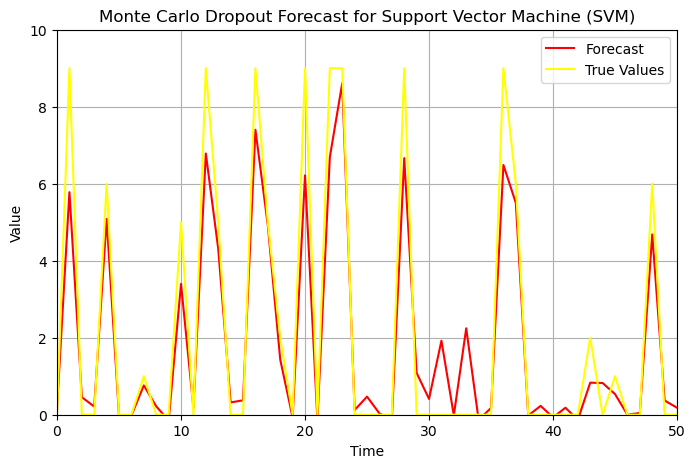

In [64]:
plot_monte_carlo_forecast(svm_forecast_mean, svm_forecast_stddev, y_val_fold, 'Support Vector Machine (SVM)')

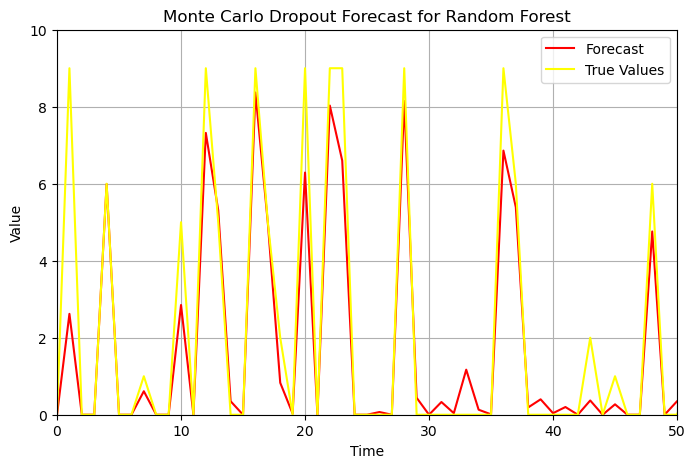

In [65]:
plot_monte_carlo_forecast(rf_forecast_mean, rf_forecast_stddev, y_val_fold, 'Random Forest')

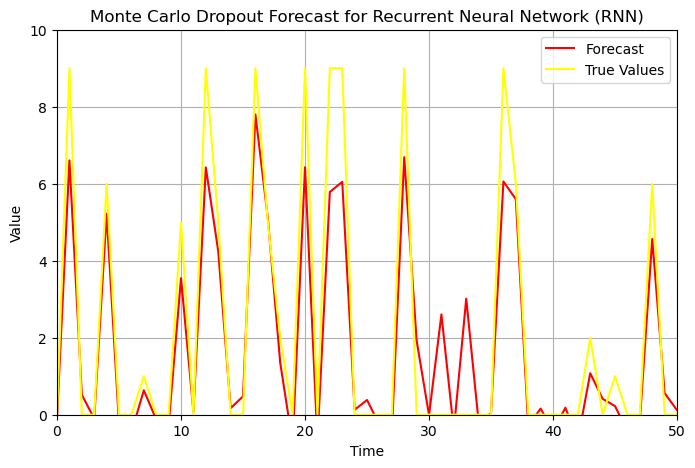

In [66]:
plot_monte_carlo_forecast(rnn_forecast_mean, rnn_forecast_stddev, y_val_fold, 'Recurrent Neural Network (RNN)')

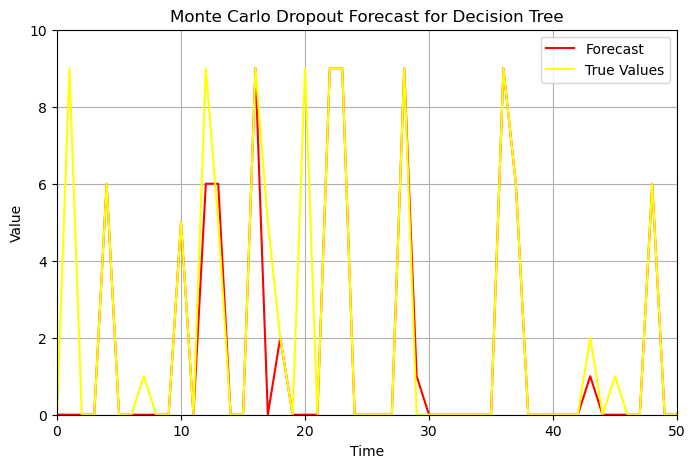

In [67]:
plot_monte_carlo_forecast(dt_forecast_mean, dt_forecast_stddev, y_val_fold, 'Decision Tree')

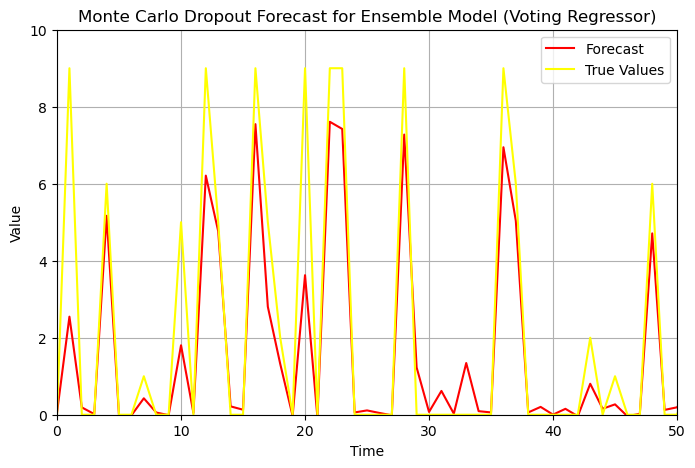

In [68]:
plot_monte_carlo_forecast(ensemble_forecast_mean, ensemble_forecast_stddev, y_val_fold, 'Ensemble Model (Voting Regressor)')


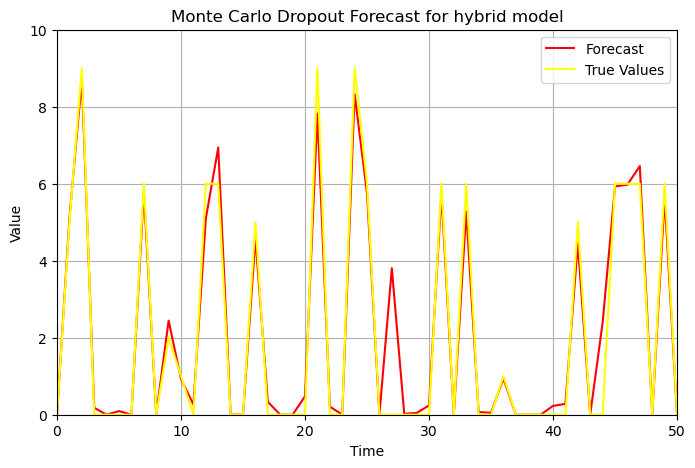

In [69]:
plot_monte_carlo_forecast(hybrid_forecast_mean, hybrid_forecast_stddev, y_test, 'hybrid model')
